In [62]:
# import modules/dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import linregress
import seaborn as sns
from datetime import datetime,date
from datetime import date
import hvplot.pandas
import pytz
import geopandas as gpd
from config import api_key
from config import client_secret
from config import geo_api_key
import petpy


In [63]:
#Petfinder API Wrapper
# create config file - and do this part
pf= petpy.Petfinder(key=api_key ,secret=client_secret)




Pull Data from Petfinder API


In [64]:
# Find Listed Animals on Petfinder for animal type dog and status adoptable dogs

adoptable_dogs_df=  pf.animals(animal_type='dog', results_per_page=100,pages=40,return_df=True,location='Chicago, Illinois')  # Adjust results_per_page to limit the number of results
adoptable_dogs_df

,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id,primary_photo_cropped
0,69416578,IL794,https://www.petfinder.com/dog/josephine-694165...,Dog,Dog,Adult,Female,Large,Curly,"[Gentle, Smart, Quiet, Dignified, Shy, Reserve...",...,None,None,Lincolnwood,IL,60712,US,69416578,dog,il794,NaN
1,69416563,IL774,https://www.petfinder.com/dog/adina-69416563/i...,Dog,Dog,Young,Female,Medium,Short,"[Friendly, Gentle, Brave, Loyal]",...,23907 West Industrial Drive North,None,Plainfield,IL,60585,US,69416563,dog,il774,NaN
2,69416515,IL794,https://www.petfinder.com/dog/elizabeth-694165...,Dog,Dog,Adult,Female,Large,Medium,"[Friendly, Affectionate, Gentle, Smart, Loyal,...",...,None,None,Lincolnwood,IL,60712,US,69416515,dog,il794,NaN
3,69416253,IL829,https://www.petfinder.com/dog/vogue-69416253/i...,Dog,Dog,Adult,Female,Medium,Short,"[Friendly, Couch potato, Loyal]",...,P.O. Box 370,None,Warrenville,IL,60555,US,69416253,dog,il829,NaN
4,69416200,IL829,https://www.petfinder.com/dog/crumbl-69416200/...,Dog,Dog,Baby,Female,Medium,None,[],...,P.O. Box 370,None,Warrenville,IL,60555,US,69416200,dog,il829,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,59251830,IL944,https://www.petfinder.com/dog/billy-59251830/i...,Dog,Dog,Adult,Male,Large,Short,[],...,None,None,Naperville,IL,60564,US,59251830,dog,il944,NaN
3996,59239097,IL192,https://www.petfinder.com/dog/killian-59239097...,Dog,Dog,Young,Male,Large,Short,[],...,13005 Ernesti Rd,None,Huntley,IL,60142,US,59239097,dog,il192,NaN
3997,59237947,MI254,https://www.petfinder.com/dog/chief-59237947/m...,Dog,Dog,Adult,Male,Large,None,[],...,323 M-62 North,PO Box 132,Cassopolis,MI,49031,US,59237947,dog,mi254,NaN
3998,59223556,IL267,https://www.petfinder.com/dog/forrie-59223556/...,Dog,Dog,Baby,Male,Medium,None,[],...,None,None,West Chicago,IL,60185,US,59223556,dog,il267,NaN


In [65]:
adoptable_dogs_df.to_csv("adoptable_dogs.csv")

In [66]:


# Find Listed Animals on Petfinder for animal type dog and status adopted dogs

adopted_dogs_df =  pf.animals(animal_type='dog', results_per_page=100,pages=40,return_df=True,location='Chicago, Illinois', status='adopted')  # Adjust results_per_page to limit the number of results
adopted_dogs_df



,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id,primary_photo_cropped.small,primary_photo_cropped.medium,primary_photo_cropped.large,primary_photo_cropped.full
0,69410200,WI542,https://www.petfinder.com/dog/sadie-69410200/w...,Dog,Dog,Young,Female,Small,None,[],...,WI,53168,US,69410200,dog,wi542,NaN,NaN,NaN,NaN
1,69399996,WI542,https://www.petfinder.com/dog/bruno-69399996/w...,Dog,Dog,Young,Male,Large,None,[],...,WI,53168,US,69399996,dog,wi542,NaN,NaN,NaN,NaN
2,69399386,IL274,https://www.petfinder.com/dog/kenya-69399386/i...,Dog,Dog,Adult,Female,Small,None,[],...,IL,60162,US,69399386,dog,il274,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
3,69399387,IL274,https://www.petfinder.com/dog/sophie-69399387/...,Dog,Dog,Adult,Female,Small,None,[],...,IL,60162,US,69399387,dog,il274,NaN,NaN,NaN,NaN
4,69392680,IL171,https://www.petfinder.com/dog/beaglejuice-6939...,Dog,Dog,Adult,Male,Medium,None,[Friendly],...,IL,60563,US,69392680,dog,il171,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,66483485,WI542,https://www.petfinder.com/dog/baby-66483485/wi...,Dog,Dog,Young,Female,Large,None,[],...,WI,53168,US,66483485,dog,wi542,NaN,NaN,NaN,NaN
3996,66483486,WI542,https://www.petfinder.com/dog/daisy-66483486/w...,Dog,Dog,Adult,Female,Small,None,[],...,WI,53168,US,66483486,dog,wi542,NaN,NaN,NaN,NaN
3997,66483487,WI542,https://www.petfinder.com/dog/benji-66483487/w...,Dog,Dog,Adult,Male,Small,None,[],...,WI,53168,US,66483487,dog,wi542,NaN,NaN,NaN,NaN
3998,66483488,WI542,https://www.petfinder.com/dog/sarge-66483488/w...,Dog,Dog,Young,Male,Small,None,[],...,WI,53168,US,66483488,dog,wi542,NaN,NaN,NaN,NaN


In [67]:
adopted_dogs_df.to_csv("adopted_dogs.csv")

In [68]:
adoptable_dogs= pd.read_csv('adoptable_dogs.csv')
adopted_dogs= pd.read_csv('adopted_dogs.csv')

In [69]:
adopted_dogs=adopted_dogs.iloc[:,1:]

In [70]:

# merge the two dataframes pulled from the API
adoptable_dogs = adoptable_dogs.reset_index(drop=True)
adopted_dogs = adopted_dogs.reset_index(drop=True)



In [71]:

# Concatenate the DataFrames with ignore_index=True
merged = pd.concat([adoptable_dogs, adopted_dogs],axis =0)
merged

,Unnamed: 0,id,organization_id,url,type,species,age,gender,size,coat,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.1,primary_photo_cropped
0,0.0,69416578,IL794,https://www.petfinder.com/dog/josephine-694165...,Dog,Dog,Adult,Female,Large,Curly,...,NaN,NaN,Lincolnwood,IL,60712,US,69416578,dog,il794,NaN
1,1.0,69416563,IL774,https://www.petfinder.com/dog/adina-69416563/i...,Dog,Dog,Young,Female,Medium,Short,...,23907 West Industrial Drive North,NaN,Plainfield,IL,60585,US,69416563,dog,il774,NaN
2,2.0,69416515,IL794,https://www.petfinder.com/dog/elizabeth-694165...,Dog,Dog,Adult,Female,Large,Medium,...,NaN,NaN,Lincolnwood,IL,60712,US,69416515,dog,il794,NaN
3,3.0,69416253,IL829,https://www.petfinder.com/dog/vogue-69416253/i...,Dog,Dog,Adult,Female,Medium,Short,...,P.O. Box 370,NaN,Warrenville,IL,60555,US,69416253,dog,il829,NaN
4,4.0,69416200,IL829,https://www.petfinder.com/dog/crumbl-69416200/...,Dog,Dog,Baby,Female,Medium,NaN,...,P.O. Box 370,NaN,Warrenville,IL,60555,US,69416200,dog,il829,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,NaN,66483485,WI542,https://www.petfinder.com/dog/baby-66483485/wi...,Dog,Dog,Young,Female,Large,NaN,...,NaN,NaN,Salem,WI,53168,US,66483485,dog,wi542,NaN
3996,NaN,66483486,WI542,https://www.petfinder.com/dog/daisy-66483486/w...,Dog,Dog,Adult,Female,Small,NaN,...,NaN,NaN,Salem,WI,53168,US,66483486,dog,wi542,NaN
3997,NaN,66483487,WI542,https://www.petfinder.com/dog/benji-66483487/w...,Dog,Dog,Adult,Male,Small,NaN,...,NaN,NaN,Salem,WI,53168,US,66483487,dog,wi542,NaN
3998,NaN,66483488,WI542,https://www.petfinder.com/dog/sarge-66483488/w...,Dog,Dog,Young,Male,Small,NaN,...,NaN,NaN,Salem,WI,53168,US,66483488,dog,wi542,NaN


Formatting and creating new columns in the dataframe

In [72]:
# update the columns
merged_df = merged[['id', 'organization_id', 'url', 'species', 'age', 'gender',
       'size', 'coat', 'tags', 'name', 'description', 'organization_animal_id',
       'photos', 'status', 'status_changed_at', 'published_at',
       'distance', 'breeds.primary', 'breeds.secondary', 'breeds.mixed',
       'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary','attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats',
       'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id']]

In [73]:

#Remove Duplicate index Values
merged_df.reset_index(drop=True, inplace=True)
adopted_dogs.reset_index(drop=True, inplace=True)

In [74]:
# Set the option to raise an error instead of a warning for chained assignments
pd.options.mode.chained_assignment = 'raise'

# Your code here

# Reset the option back to the default behavior (optional)
pd.options.mode.chained_assignment = None

# Standardizing date format
merged_df['published_at'] = pd.to_datetime(merged_df['published_at'])
merged_df['status_changed_at'] = pd.to_datetime(merged_df['status_changed_at'])

# added a new column to the dataframe to count the number of days on the site for adopted dogs
merged_df['days_on_petfinder'] = (merged_df['status_changed_at'] - merged_df['published_at']).dt.days
merged_df['days_on_petfinder'] = merged_df['days_on_petfinder'].round()




In [75]:
# creating date format for adoptable days online
today = datetime.now()

merged_df['today']= datetime.now()

central_timezone = pytz.timezone('US/Central')
aware_datetime = today.astimezone(central_timezone)
aware_datetime

datetime.datetime(2023, 10, 23, 22, 36, 45, 334310, tzinfo=<DstTzInfo 'US/Central' CDT-1 day, 19:00:00 DST>)

In [76]:
# creating new column for adoptable days online

merged_df['today'] = aware_datetime

merged_df['adoptable_days_online'] =(merged_df['today'] - merged_df['published_at']).dt.days

In [132]:
merged_df.columns

Index(['id', 'organization_id', 'url', 'species', 'age', 'gender', 'size',
       'coat', 'tags', 'name', 'description', 'organization_animal_id',
       'photos', 'status', 'status_changed_at', 'published_at', 'distance',
       'breeds.primary', 'breeds.secondary', 'breeds.mixed', 'breeds.unknown',
       'colors.primary', 'colors.secondary', 'colors.tertiary',
       'attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats',
       'contact.address.address1', 'contact.address.address2',
       'contact.address.city', 'contact.address.state',
       'contact.address.postcode', 'contact.address.country', 'animal_id',
       'animal_type', 'organization_id', 'days_on_petfinder', 'today',
       'adoptable_days_online', 'address'],
      dtype='object')

In [133]:
# merging addresses into a single column
address_df = merged_df.iloc[:,30:36]
address_df['url']=merged_df['url']
address_df['species']=merged_df['species']
address_df['status']=merged_df['status']
address_df

,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,url,species,status
0,NaN,Lincolnwood,IL,60712,US,69416578,https://www.petfinder.com/dog/josephine-694165...,Dog,adoptable
1,NaN,Plainfield,IL,60585,US,69416563,https://www.petfinder.com/dog/adina-69416563/i...,Dog,adoptable
2,NaN,Lincolnwood,IL,60712,US,69416515,https://www.petfinder.com/dog/elizabeth-694165...,Dog,adoptable
3,NaN,Warrenville,IL,60555,US,69416253,https://www.petfinder.com/dog/vogue-69416253/i...,Dog,adoptable
4,NaN,Warrenville,IL,60555,US,69416200,https://www.petfinder.com/dog/crumbl-69416200/...,Dog,adoptable
...,...,...,...,...,...,...,...,...,...
7995,NaN,Salem,WI,53168,US,66483485,https://www.petfinder.com/dog/baby-66483485/wi...,Dog,adopted
7996,NaN,Salem,WI,53168,US,66483486,https://www.petfinder.com/dog/daisy-66483486/w...,Dog,adopted
7997,NaN,Salem,WI,53168,US,66483487,https://www.petfinder.com/dog/benji-66483487/w...,Dog,adopted
7998,NaN,Salem,WI,53168,US,66483488,https://www.petfinder.com/dog/sarge-66483488/w...,Dog,adopted


In [134]:
# creating new column for the address

address_df['combined_address'] = address_df.apply(lambda row: ', '.join(str(x) for x in row), axis=1)
address_df

,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,url,species,status,combined_address
0,NaN,Lincolnwood,IL,60712,US,69416578,https://www.petfinder.com/dog/josephine-694165...,Dog,adoptable,"nan, Lincolnwood, IL, 60712, US, 69416578, htt..."
1,NaN,Plainfield,IL,60585,US,69416563,https://www.petfinder.com/dog/adina-69416563/i...,Dog,adoptable,"nan, Plainfield, IL, 60585, US, 69416563, http..."
2,NaN,Lincolnwood,IL,60712,US,69416515,https://www.petfinder.com/dog/elizabeth-694165...,Dog,adoptable,"nan, Lincolnwood, IL, 60712, US, 69416515, htt..."
3,NaN,Warrenville,IL,60555,US,69416253,https://www.petfinder.com/dog/vogue-69416253/i...,Dog,adoptable,"nan, Warrenville, IL, 60555, US, 69416253, htt..."
4,NaN,Warrenville,IL,60555,US,69416200,https://www.petfinder.com/dog/crumbl-69416200/...,Dog,adoptable,"nan, Warrenville, IL, 60555, US, 69416200, htt..."
...,...,...,...,...,...,...,...,...,...,...
7995,NaN,Salem,WI,53168,US,66483485,https://www.petfinder.com/dog/baby-66483485/wi...,Dog,adopted,"nan, Salem, WI, 53168, US, 66483485, https://w..."
7996,NaN,Salem,WI,53168,US,66483486,https://www.petfinder.com/dog/daisy-66483486/w...,Dog,adopted,"nan, Salem, WI, 53168, US, 66483486, https://w..."
7997,NaN,Salem,WI,53168,US,66483487,https://www.petfinder.com/dog/benji-66483487/w...,Dog,adopted,"nan, Salem, WI, 53168, US, 66483487, https://w..."
7998,NaN,Salem,WI,53168,US,66483488,https://www.petfinder.com/dog/sarge-66483488/w...,Dog,adopted,"nan, Salem, WI, 53168, US, 66483488, https://w..."


In [79]:
# renaming column
merged_df['address'] = address_df['combined_address']

Output data to CSV file

In [80]:

# merged_df.to_csv("merged_dog_data.csv")

***In our analysis below, we are looking to test the hypothesis that black dogs take longer to adopt. This is also known as Black Dog Syndrome. We will also work to identify other characteristics that might be a factor such as breed, size, age, or coat***

Analysis

In [81]:
# import csv file
dogs = pd.read_csv("Datasets/merged_dog_data.csv")


Clean the dataset

In [82]:
# Drop the duplicates
dogs = dogs.drop_duplicates(subset=['id'])
dogs.count()

Unnamed: 0                  7934
id                          7934
organization_id             7934
organization_id.1           7934
url                         7934
species                     7934
age                         7934
gender                      7934
size                        7934
coat                        2835
tags                        7934
name                        7934
description                 6660
organization_animal_id      4504
photos                      7934
status                      7934
status_changed_at           7934
published_at                7934
distance                    7934
breeds.primary              7934
breeds.secondary            3030
breeds.mixed                7934
breeds.unknown              7934
colors.primary              3469
colors.secondary            1838
colors.tertiary              202
attributes.special_needs    7934
attributes.shots_current    7934
environment.children        3100
environment.dogs            4084
environmen

In [83]:
# filter the dataset by adopted and adoptable
adoptable = dogs[dogs["status"] == "adoptable"]
adoptable.count()

Unnamed: 0                  3999
id                          3999
organization_id             3999
organization_id.1           3999
url                         3999
species                     3999
age                         3999
gender                      3999
size                        3999
coat                        1748
tags                        3999
name                        3999
description                 3549
organization_animal_id      1905
photos                      3999
status                      3999
status_changed_at           3999
published_at                3999
distance                    3999
breeds.primary              3999
breeds.secondary            1731
breeds.mixed                3999
breeds.unknown              3999
colors.primary              2325
colors.secondary            1226
colors.tertiary              123
attributes.special_needs    3999
attributes.shots_current    3999
environment.children        1528
environment.dogs            2141
environmen

In [84]:
# filter the dataset by adopted and adoptable
adopted = dogs[dogs["status"] == "adopted"]
adopted.count()

Unnamed: 0                  3935
id                          3935
organization_id             3935
organization_id.1           3935
url                         3935
species                     3935
age                         3935
gender                      3935
size                        3935
coat                        1087
tags                        3935
name                        3935
description                 3111
organization_animal_id      2599
photos                      3935
status                      3935
status_changed_at           3935
published_at                3935
distance                    3935
breeds.primary              3935
breeds.secondary            1299
breeds.mixed                3935
breeds.unknown              3935
colors.primary              1144
colors.secondary             612
colors.tertiary               79
attributes.special_needs    3935
attributes.shots_current    3935
environment.children        1572
environment.dogs            1943
environmen

Total percentage of Dogs which were adpoted or adoptable by color







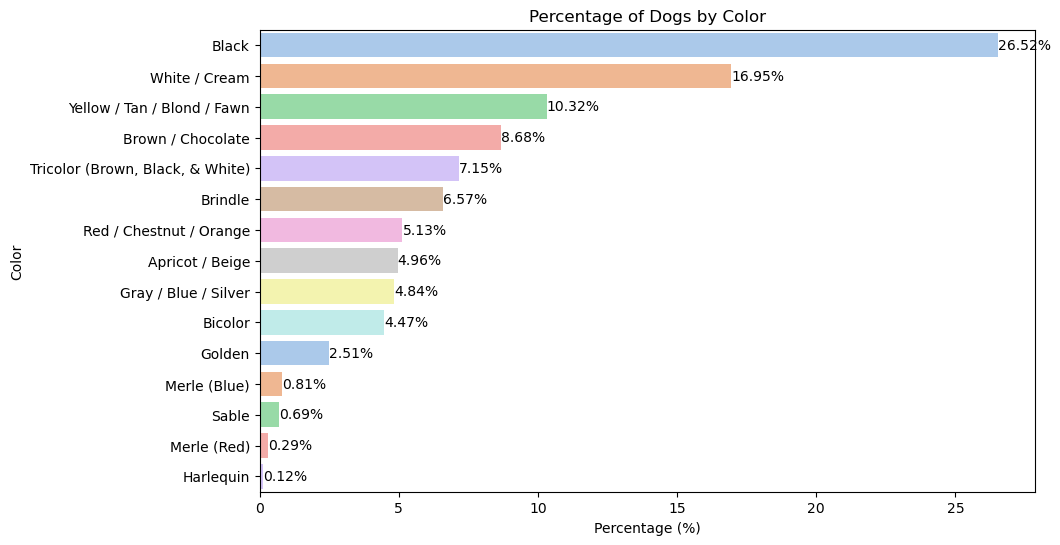

In [86]:
# creating chart by color
color_counts = dogs['colors.primary'].value_counts()
# Calculate the percentages
total_count = color_counts.sum()
color_percentages = (color_counts / total_count) * 100
# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=color_percentages, y=color_counts.index, palette='pastel')
plt.xlabel('Percentage (%)')
plt.ylabel('Color')
plt.title('Percentage of Dogs by Color')
# Annotate the bars with percentage values
for i, v in enumerate(color_percentages):
    ax.text(v, i, f'{v:.2f}%', color='black', va='center')
plt.savefig('figures/total_dogs_by_color.png')
plt.show()

Black dogs are the most frequent color dog available in our sample of Chicago area data making this a great dataset to analyze for black dogs

Analysis of dogs by color and status

In [87]:

# percentage of adoptable dogs by color
adoptable_color = adoptable.groupby("colors.primary").count()
adoptable_color = adoptable_color["id"]
adoptable_color_df = pd.DataFrame(adoptable_color)
adoptable_color_df.reset_index(inplace=True)
adoptable_color_df['% Total'] = adoptable_color_df['id'] / len(adoptable)
adoptable_color_df = adoptable_color_df.sort_values(by='id', ascending=False)
adoptable_color_df

,colors.primary,id,% Total
2,Black,623,0.155789
13,White / Cream,411,0.102776
14,Yellow / Tan / Blond / Fawn,242,0.060515
4,Brown / Chocolate,221,0.055264
3,Brindle,172,0.043011
12,"Tricolor (Brown, Black, & White)",132,0.033008
6,Gray / Blue / Silver,123,0.030758
10,Red / Chestnut / Orange,115,0.028757
0,Apricot / Beige,104,0.026007
1,Bicolor,102,0.025506


In [88]:
# adoptable days online by color
adoptable_color_days = adoptable.groupby('colors.primary')['adoptable_days_online'].mean()
adoptable_count = adoptable.groupby('colors.primary')['id'].count()
adoptable_color_days_df = pd.concat([adoptable_color_days, adoptable_count], axis=1)
adoptable_color_days_df.reset_index(inplace=True)
adoptable_color_days_df = adoptable_color_days_df.sort_values(by='id', ascending=False).round()
top_10_adoptable = adoptable_color_days_df.head(10).sort_values(by='adoptable_days_online', ascending=False)

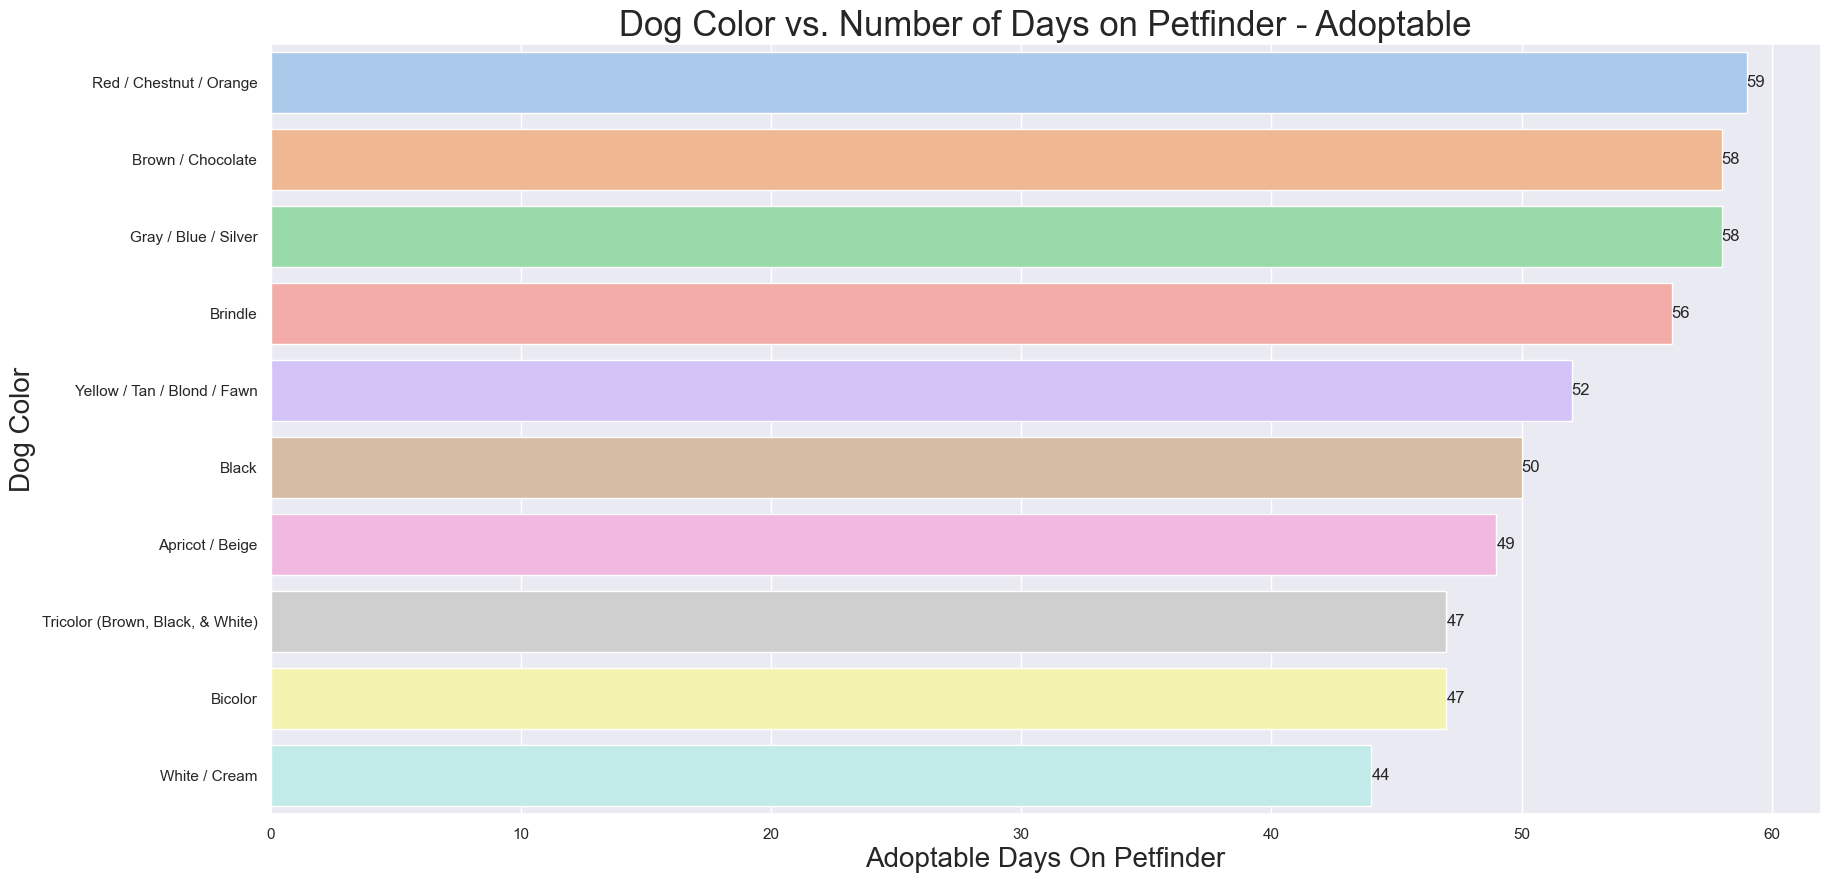

In [89]:
#Sets the size of the bars
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x = 'adoptable_days_online',data = top_10_adoptable,y='colors.primary',palette='pastel')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Adoptable Days On Petfinder', fontsize = 20)
plt.ylabel('Dog Color', fontsize = 20)
plt.title('Dog Color vs. Number of Days on Petfinder - Adoptable', fontsize = 25)
plt.savefig('figures/adoptable_days_online_by_color.png')
plt.show()

In [90]:
# percentage of adopted dogs by color
adopted_color = adopted.groupby("colors.primary").count()
adopted_color = adopted_color["id"]
adopted_color_df = pd.DataFrame(adopted_color)
adopted_color_df.reset_index(inplace=True)
adopted_color_df['% Total'] = adopted_color_df['id'] / len(adopted)
adopted_color_df = adopted_color_df.sort_values(by='id', ascending=False)
adopted_color_df



,colors.primary,id,% Total
2,Black,297,0.075476
13,White / Cream,177,0.044981
12,"Tricolor (Brown, Black, & White)",116,0.029479
14,Yellow / Tan / Blond / Fawn,116,0.029479
4,Brown / Chocolate,80,0.020330
0,Apricot / Beige,68,0.017281
10,Red / Chestnut / Orange,63,0.016010
3,Brindle,56,0.014231
1,Bicolor,53,0.013469
6,Gray / Blue / Silver,45,0.011436


In [91]:
# adopted days online by color
adopted_color_days = adopted.groupby('colors.primary')['days_on_petfinder'].mean()
adopted_count = adopted.groupby('colors.primary')['id'].count()
adopted_color_days_df = pd.concat([adopted_color_days, adopted_count], axis=1)
adopted_color_days_df.reset_index(inplace=True)
adopted_color_days_df = adopted_color_days_df.sort_values(by='id', ascending=False).round()
top_10_adopted = adopted_color_days_df.head(10).sort_values(by='days_on_petfinder', ascending=False)

top_10_adopted

,colors.primary,days_on_petfinder,id
10,Red / Chestnut / Orange,14.0,63
2,Black,13.0,297
13,White / Cream,13.0,177
12,"Tricolor (Brown, Black, & White)",13.0,116
3,Brindle,13.0,56
1,Bicolor,13.0,53
6,Gray / Blue / Silver,13.0,45
14,Yellow / Tan / Blond / Fawn,12.0,116
4,Brown / Chocolate,12.0,80
0,Apricot / Beige,9.0,68


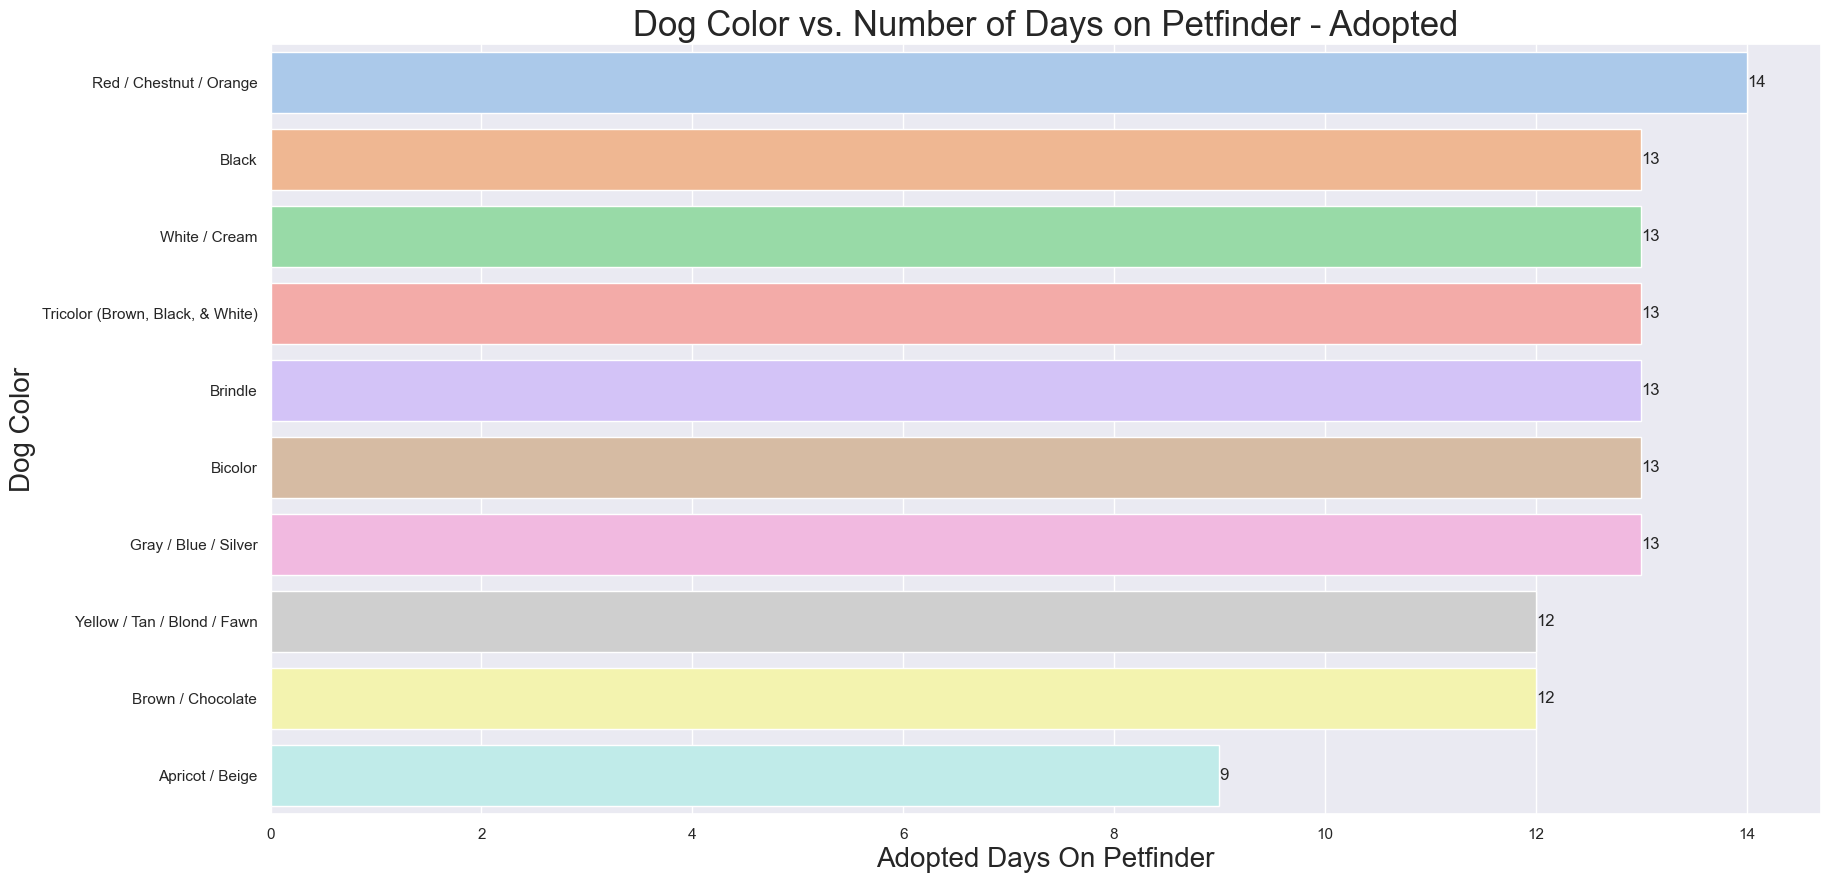

In [92]:
#Sets the size of the bars
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x = 'days_on_petfinder',data = top_10_adopted,y='colors.primary',palette='pastel')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Adopted Days On Petfinder', fontsize = 20)
plt.ylabel('Dog Color', fontsize = 20)
plt.title('Dog Color vs. Number of Days on Petfinder - Adopted', fontsize = 25)
plt.savefig('figures/adopted_days_online_by_color.png')
plt.show()

In both adoptable and adopted dogs, Black dogs are not online substantially longer than other colors

Complete ttest by color

In [93]:
# complete a ttest
test_adoptable_color = adoptable_color_df["id"]
test_adopted_color = adopted_color_df["id"]

test_adoptable_color_df = pd.DataFrame(test_adoptable_color)
test_adopted_color_df = pd.DataFrame(test_adopted_color)
stats.ttest_ind(test_adoptable_color, test_adopted_color, equal_var=False)


TtestResult(statistic=1.6342883011557583, pvalue=0.1181561385195702, df=19.60289355150065)

1.6342883011557583 0.11339348653670268


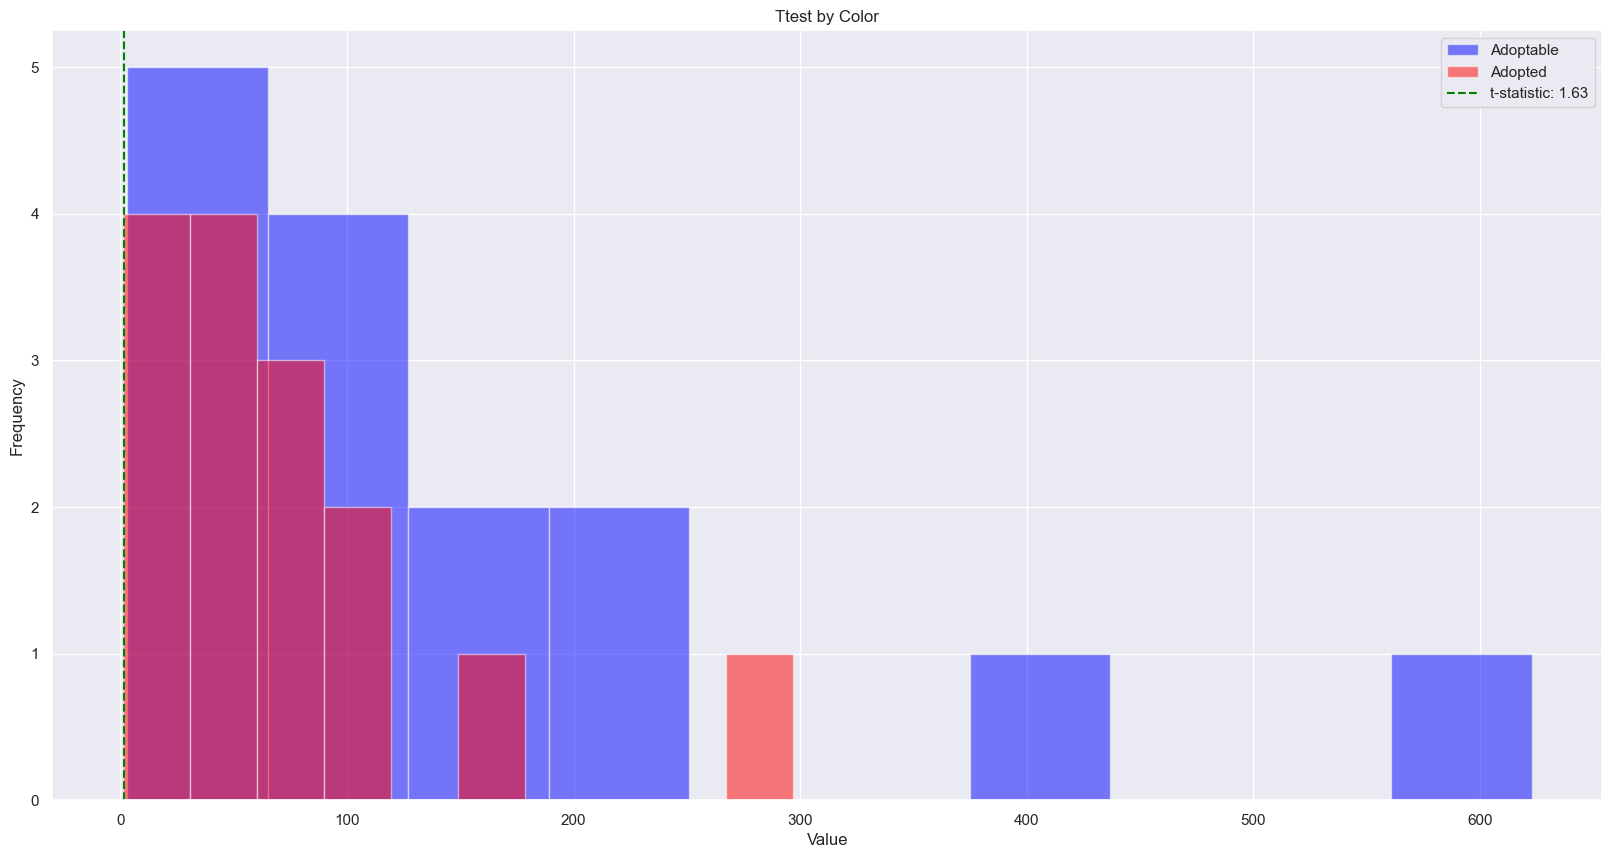

In [94]:
# creating ttest by color for adopted and adoptable dogs
t_statistic, p_value = stats.ttest_ind(test_adoptable_color_df['id'], test_adopted_color_df['id'])

plt.hist(test_adoptable_color_df['id'], alpha=0.5, label='Adoptable', color='blue')
plt.hist(test_adopted_color_df['id'], alpha=0.5, label='Adopted', color='red')

plt.axvline(x=t_statistic, color='green', linestyle='--', label=f't-statistic: {t_statistic:.2f}')
plt.title('Ttest by Color')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('figures/ttest_by_color.png')
print(t_statistic,p_value)

In the findings of the ttest, the pvalue is .11 which is over .05 showing us that in the distribution of colors in adoptable vs. already adopted dogs, these populations are statistically different. 

Analysis of dogs by breed

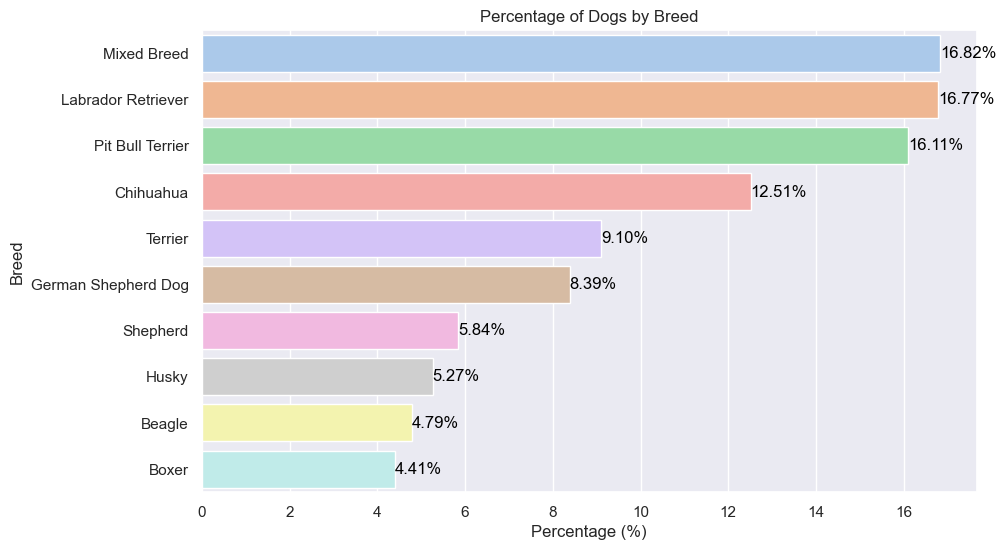

In [95]:
breed_counts = dogs['breeds.primary'].value_counts().head(10)
# Calculate the percentages
total_count = breed_counts.sum()
breed_percentages = (breed_counts / total_count) * 100
# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=breed_percentages, y=breed_counts.index, palette='pastel')
plt.xlabel('Percentage (%)')
plt.ylabel('Breed')
plt.title('Percentage of Dogs by Breed')
# Annotate the bars with percentage values
for i, v in enumerate(breed_percentages):
    ax.text(v, i, f'{v:.2f}%', color='black', va='center')
plt.savefig('figures/percentage_of_dogs_by_breed.png')
plt.show()

Pit Bulls, Mixed Breed dogs, and Labrador Retrievers are the most frequently available or already adopted dogs.

Top 10 Breeds

In [96]:
# adoptable days online by breed
adoptable_breeds_days = adoptable.groupby('breeds.primary')['adoptable_days_online'].mean()
adoptable_breed_count = adoptable.groupby('breeds.primary')['id'].count()
adoptable_breeds_days_df = pd.concat([adoptable_breeds_days, adoptable_breed_count], axis=1)
adoptable_breeds_days_df.reset_index(inplace=True)
adoptable_breeds_days_df = adoptable_breeds_days_df.sort_values(by='id', ascending=False).round()
top_10_adoptable_breeds = adoptable_breeds_days_df.head(10).sort_values(by='adoptable_days_online', ascending=False)

top_10_adoptable_breeds

,breeds.primary,adoptable_days_online,id
107,Pit Bull Terrier,61.0,537
96,Mixed Breed,59.0,461
8,American Staffordshire Terrier,59.0,112
28,Boxer,58.0,103
40,Chihuahua,52.0,190
128,Shepherd,51.0,127
141,Terrier,50.0,165
70,German Shepherd Dog,49.0,178
87,Labrador Retriever,46.0,310
79,Husky,46.0,98


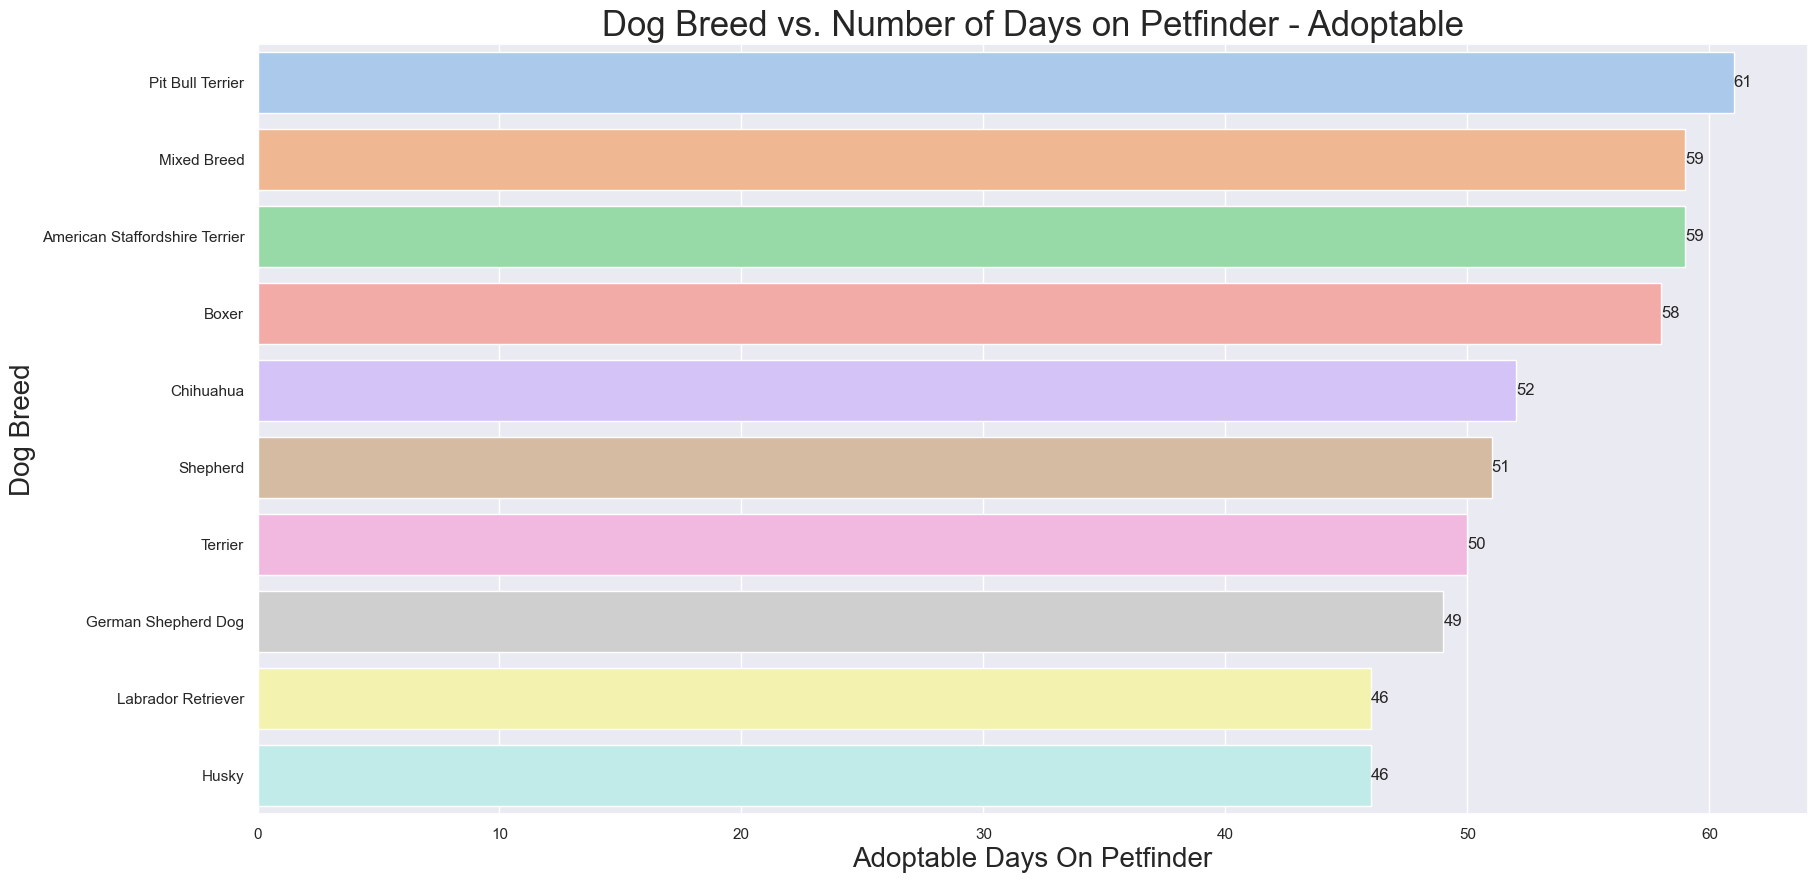

In [97]:
#Sets the size of the bars
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x = 'adoptable_days_online',data = top_10_adoptable_breeds,y='breeds.primary',palette='pastel')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Adoptable Days On Petfinder', fontsize = 20)
plt.ylabel('Dog Breed', fontsize = 20)
plt.title('Dog Breed vs. Number of Days on Petfinder - Adoptable', fontsize = 25)
plt.savefig('figures/adoptable_days_online_by_breed.png')
plt.show()

In [98]:
# average adopted days online by breed
adopted_breeds_days = adopted.groupby('breeds.primary')['days_on_petfinder'].mean()
adopted_breed_count = adopted.groupby('breeds.primary')['id'].count()
adopted_breeds_days_df = pd.concat([adopted_breeds_days, adopted_breed_count], axis=1)
adopted_breeds_days_df.reset_index(inplace=True)
adopted_breeds_days_df = adopted_breeds_days_df.sort_values(by='id', ascending=False).round()
top_10_adopted_breeds = adopted_breeds_days_df.head(10).sort_values(by='days_on_petfinder', ascending=False)

top_10_adopted_breeds

,breeds.primary,days_on_petfinder,id
109,Pit Bull Terrier,11.0,139
99,Mixed Breed,8.0,245
71,German Shepherd Dog,6.0,174
16,Beagle,6.0,130
88,Labrador Retriever,5.0,394
130,Shepherd,5.0,118
141,Terrier,4.0,217
46,Chihuahua,3.0,335
82,Husky,3.0,123
23,Black Labrador Retriever,2.0,112


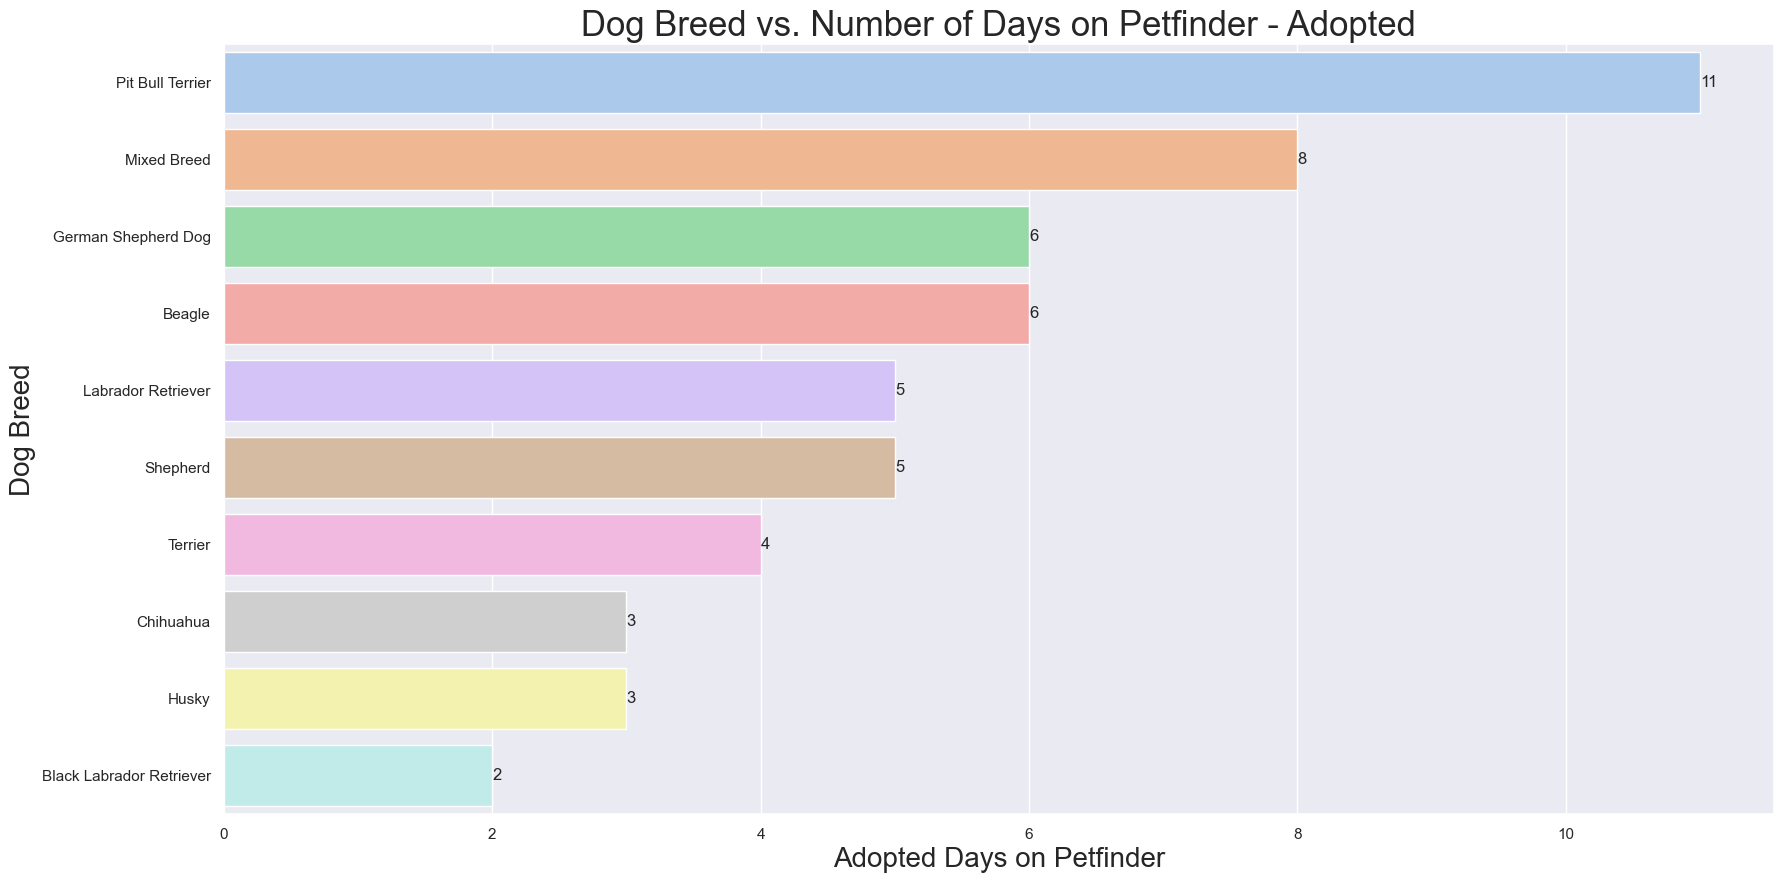

In [99]:
#Sets the size of the bars
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x = 'days_on_petfinder',data = top_10_adopted_breeds,y='breeds.primary',palette='pastel')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Adopted Days on Petfinder', fontsize = 20)
plt.ylabel('Dog Breed', fontsize = 20)
plt.title('Dog Breed vs. Number of Days on Petfinder - Adopted', fontsize = 25)
plt.savefig('figures/adopted_days_online_by_breed.png')
plt.show()

In both our adoptable and already adopted dog populations, Pitbulls take the longest to find a home

Adoptable Dog Breed Instance Word Cloud

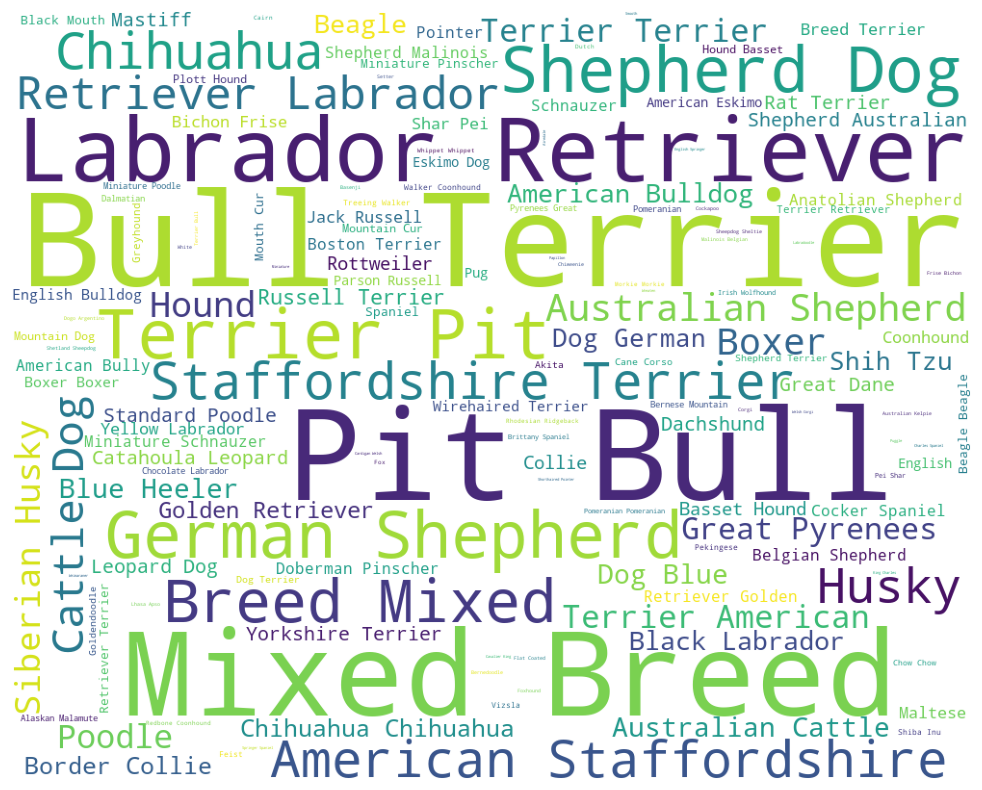

In [101]:
# creating wordcloud out of number of adopted dog breed listings
from wordcloud import WordCloud

fig,ax = plt.subplots(figsize =(14,10))
words = ' '.join(dogs['breeds.primary'].loc[dogs['status']=='adoptable'].values)
wordcloud = WordCloud(max_font_size=None,background_color='white',width=1000,height=800).generate(words)
plt.axis('off')
plt.savefig('figures/adoptable_breeds_word_cloud.png')
plt.imshow(wordcloud)


Adopted Dog Breed Instance Word Cloud

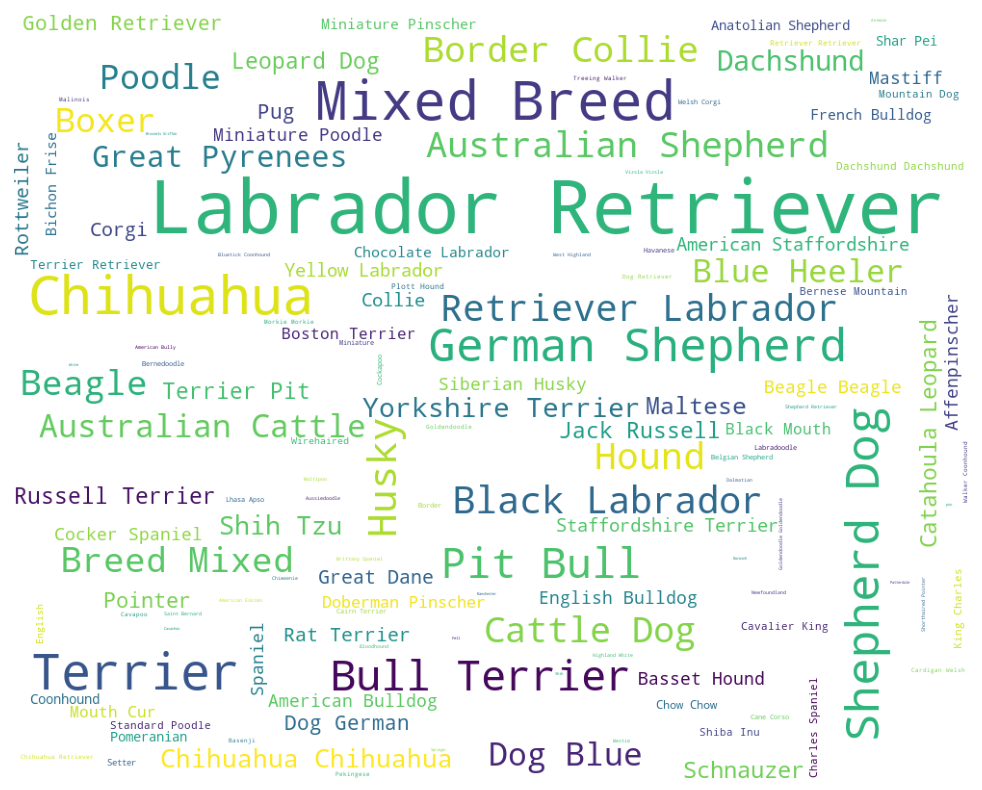

In [102]:
# creating wordcloud out of number of adopted dog breed listings
from wordcloud import WordCloud
fig,ax = plt.subplots(figsize =(14,10))
words = ' '.join(dogs['breeds.primary'].loc[dogs['status']=='adopted'].values)
wordcloud = WordCloud(max_font_size=None,background_color='white',width=1000,height=800).generate(words)
plt.axis('off')
plt.savefig('figures/adopted_breeds_word_cloud.png')
plt.imshow(wordcloud)


While Pit Bulls are the most frequently available dogs for adoption, the Labrador Retriever is the most frequently adopted dog, highlighting the difference in breed preferences

Map of Adoption Organization Data 

In [146]:
#Create a new dataframe fro the organizations from where you can adopt a pet
organization_df =pd.DataFrame()
organization_df['id']=dogs['organization_id']
organization_df['City']=address_df['contact.address.city']
organization_df['Address']=address_df['combined_address']
organization_df['State']=address_df['contact.address.state']
organization_df['url']=address_df['url']
organization_df['species'] =address_df['species']
organization_df['status'] = address_df['status']
organization_df["Lat"] = ""
organization_df["Lon"] = ""
organization_df

,id,City,Address,State,url,species,status,Lat,Lon
0,IL145,Lincolnwood,"nan, Lincolnwood, IL, 60712, US, 69416578, htt...",IL,https://www.petfinder.com/dog/josephine-694165...,Dog,adoptable,,
1,IL145,Plainfield,"nan, Plainfield, IL, 60585, US, 69416563, http...",IL,https://www.petfinder.com/dog/adina-69416563/i...,Dog,adoptable,,
2,IL145,Lincolnwood,"nan, Lincolnwood, IL, 60712, US, 69416515, htt...",IL,https://www.petfinder.com/dog/elizabeth-694165...,Dog,adoptable,,
3,IL145,Warrenville,"nan, Warrenville, IL, 60555, US, 69416253, htt...",IL,https://www.petfinder.com/dog/vogue-69416253/i...,Dog,adoptable,,
4,IL145,Warrenville,"nan, Warrenville, IL, 60555, US, 69416200, htt...",IL,https://www.petfinder.com/dog/crumbl-69416200/...,Dog,adoptable,,
...,...,...,...,...,...,...,...,...,...
7995,IL81,Salem,"nan, Salem, WI, 53168, US, 66483485, https://w...",WI,https://www.petfinder.com/dog/baby-66483485/wi...,Dog,adopted,,
7996,IL81,Salem,"nan, Salem, WI, 53168, US, 66483486, https://w...",WI,https://www.petfinder.com/dog/daisy-66483486/w...,Dog,adopted,,
7997,IL81,Salem,"nan, Salem, WI, 53168, US, 66483487, https://w...",WI,https://www.petfinder.com/dog/benji-66483487/w...,Dog,adopted,,
7998,IL81,Salem,"nan, Salem, WI, 53168, US, 66483488, https://w...",WI,https://www.petfinder.com/dog/sarge-66483488/w...,Dog,adopted,,


In [155]:
#Drop duplicate 
organization_df.drop_duplicates(subset='id', keep='first', inplace=True)


In [148]:
# Define the API parameters
params = {
    "apiKey":geo_api_key,
    "format":"json"
}

# Set base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [149]:
import requests
# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in organization_df.iterrows():

    # Get the city's name & add ", Australia" to the string so geoapify finds the correct city
    city = row["City"] +"," +row["State"]+ ", US"

    # Add the current city to the parameters
    params["text"] = f"{city}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert response to JSON
    response = response.json()
  

    # Extract latitude and longitude
    organization_df.loc[index, "Lat"] = response["results"][0]["lat"]
    organization_df.loc[index, "Lon"] = response["results"][0]["lon"]
    
# Display sample data to confirm that the coordinates appear
organization_df.head()

,id,City,Address,State,url,species,status,Lat,Lon
0,IL145,Lincolnwood,"nan, Lincolnwood, IL, 60712, US, 69416578, htt...",IL,https://www.petfinder.com/dog/josephine-694165...,Dog,adoptable,42.005598,-87.735572
9,WI81,Crystal Lake,"nan, Crystal Lake, IL, 60014, US, 69416028, ht...",IL,https://www.petfinder.com/dog/wisconsin-694160...,Dog,adoptable,42.241134,-88.316197
11,IL845,Peotone,"nan, Peotone, IL, 60468, US, 69415999, https:/...",IL,https://www.petfinder.com/dog/bruce-69415999/i...,Dog,adoptable,41.332372,-87.785086
15,IL157,Milwaukee,"nan, Milwaukee, WI, 53214, US, 69415563, https...",WI,https://www.petfinder.com/dog/bodhi-69415563/w...,Dog,adoptable,43.034993,-87.922497
17,WI47,McHenry,"nan, McHenry, IL, 60051, US, 69415505, https:/...",IL,https://www.petfinder.com/dog/stella-rose-6941...,Dog,adoptable,42.343143,-88.267488


In [ ]:
#import geoviews 

In [156]:
%%capture --no-display
# Create a map using hvplot
map_plot =organization_df.hvplot.points("Lon", 
                                   "Lat", 
                                   geo = True,
                                   frame_width=500,
                                   frame_height=500,
                                   color = "City",
                                   alpha = 0.8,
                                   size = 100,
                                   tiles = "OSM",
                                   hover_cols = ["Address","url"]
                                  )

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,Address,url)

Correlation Matrix

In [110]:
# mapping the age column
value_mapping_age = {'Baby': 1, 'Young': 2, 'Adult': 3, 'Senior': 4}
value_mapping_size = {'Small': 1, 'Medium': 2, 'Large': 3, 'Extra Large': 4}
value_mapping_gender ={"Male":1,"Female":2}
value_mapping_coat={'Short': 1, 'Medium':2, 'Long':3,'Curly':4,'Wire':5 }
value_mapping_status={'adopted': 1, 'adoptable':2,  }
dogs_corr = dogs.copy()
# Replace values in the 'Category' column using the mapping
dogs_corr['age'] = dogs_corr['age'].replace(value_mapping_age)
dogs_corr['size'] = dogs_corr['size'].replace(value_mapping_size)
dogs_corr['gender'] = dogs_corr['gender'].replace(value_mapping_gender)
dogs_corr['coat'] = dogs_corr['coat'].replace(value_mapping_coat)
dogs_corr['status'] = dogs_corr['status'].replace(value_mapping_status)

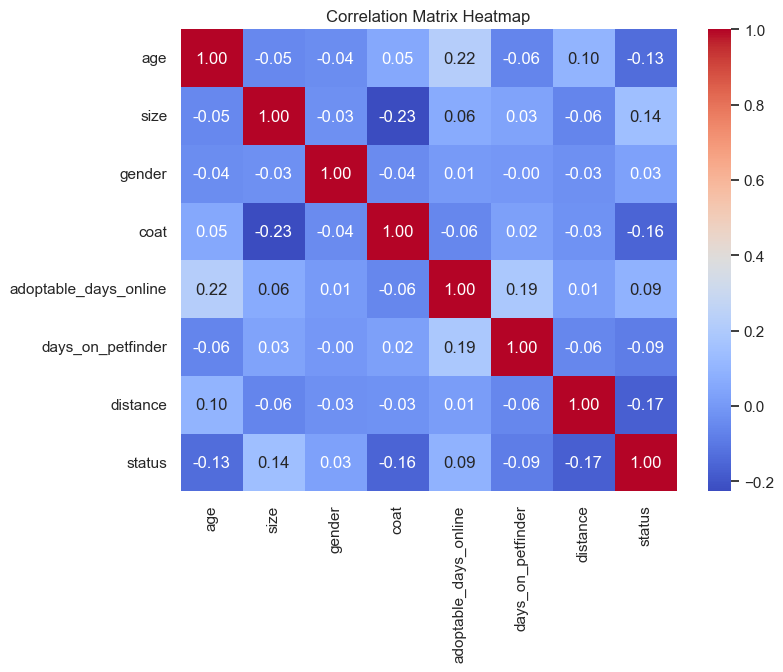

In [153]:
selected_columns = ['age', 'size', 'gender','coat','adoptable_days_online','days_on_petfinder','distance','status']
# Calculate the correlation matrix for selected columns
correlation_matrix = dogs_corr[selected_columns].corr()
# Set the plot size
plt.figure(figsize=(8,6))
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Add a title
plt.title('Correlation Matrix Heatmap')
plt.savefig("figures/correlation_matrix.png")
# Display the heatmap
plt.show()

In a correlation heatmap, the color intensity represents the strength and direction of the correlation between two variables.

Correlation values typically range from -1 to 1.

A positive correlation (closer to 1) is represented with warmer colors, such as red.

A negative correlation (closer to -1) is represented with cooler colors, such as blue.

No correlation (close to 0) is represented as a neutral color.

Dark red or dark blue squares indicate strong positive or negative correlations, respectively.

This means that when one variable increases, the other is likely to increase or decrease.

Lighter colors (closer to white) indicate weaker or no correlation between variables.

The diagonal line (top left to bottom right) of the heatmap which is red represents the correlation of a variable with itself, which is always perfect (correlation of 1)

Linear Regression on Age vs. Days Online

In [112]:
# creating dataframe by adoptable age
adoptable_age = adoptable.groupby("age").count()
adoptable_age = adoptable_age["id"]



In [113]:

adoptable_age_df = pd.DataFrame(adoptable_age)
adoptable_age_df.reset_index(inplace=True)
adoptable_age_df['% Total'] = adoptable_age_df['id'] / len(adoptable)
adoptable_age_df

,age,id,% Total
0,Adult,1593,0.398350
1,Baby,1211,0.302826
2,Senior,238,0.059515
3,Young,957,0.239310


Mapping the age column to numeric values

In [114]:
# mapping the age column
value_mapping_age = {'Baby': 1, 'Young': 2, 'Adult': 3, 'Senior': 4}
adoptable_age_corr = adoptable.copy()


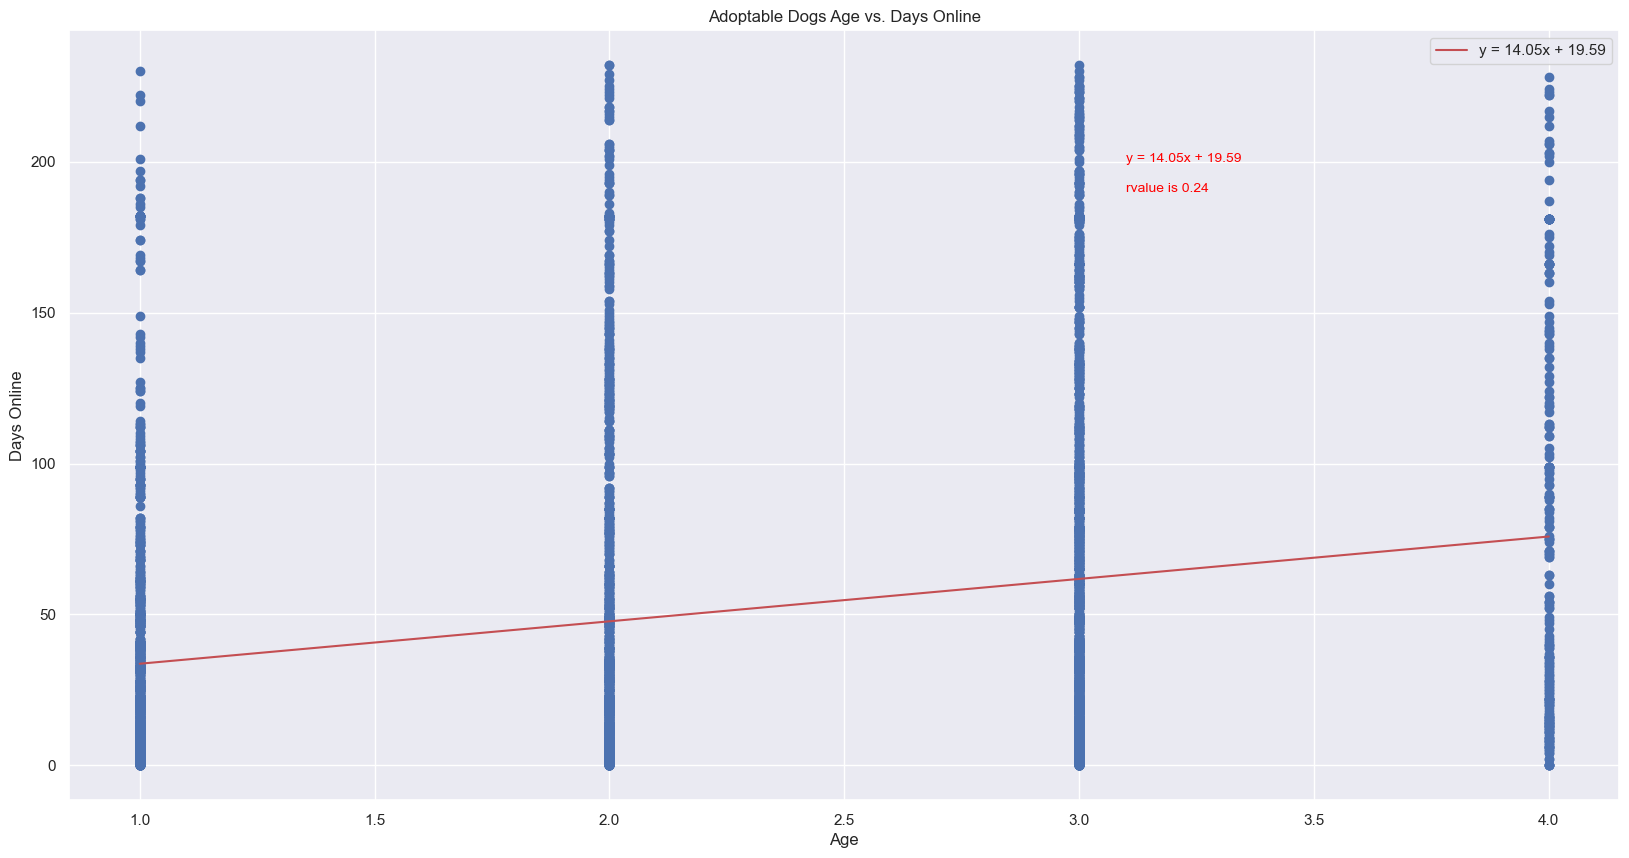

In [115]:
# CHange labels to values 
# Replace values in the 'Category' column using the mapping
adoptable_age_corr['age'] = adoptable_age_corr['age'].replace(value_mapping_age)
adoptable_age_corr = adoptable_age_corr.sort_values(by='age')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(adoptable_age_corr['age'], adoptable_age_corr['adoptable_days_online'])
regress_values = adoptable_age_corr['age'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
labels=['Baby', 'Young','Adult', 'Senior']
plt.scatter(adoptable_age_corr['age'],adoptable_age_corr['adoptable_days_online'])
plt.plot(adoptable_age_corr['age'],regress_values,"r-", label=line_eq)
plt.annotate(line_eq,(3.1,200),fontsize=10,color="red")
plt.annotate(f"rvalue is {round(rvalue,2)}",(3.1,190),fontsize=10,color="red")
plt.legend()

plt.xlabel('Age')
plt.ylabel('Days Online')
plt.title('Adoptable Dogs Age vs. Days Online')
plt.savefig('figures/adoptable_dogs_by_age_linearregression.png')
plt.show()



In [ ]:
# creating dataframe by adopted age

adopted_age = adopted.groupby("age").count()
adopted_age = adopted_age["id"]
adopted_age_df = pd.DataFrame(adopted_age)
adopted_age_df.reset_index(inplace=True)
adopted_age_df['% Total'] = adopted_age_df['id'] / len(adopted)
adopted_age_df

,age,id,% Total
0,Adult,1892,0.480813
1,Baby,825,0.209657
2,Senior,390,0.099111
3,Young,828,0.210419


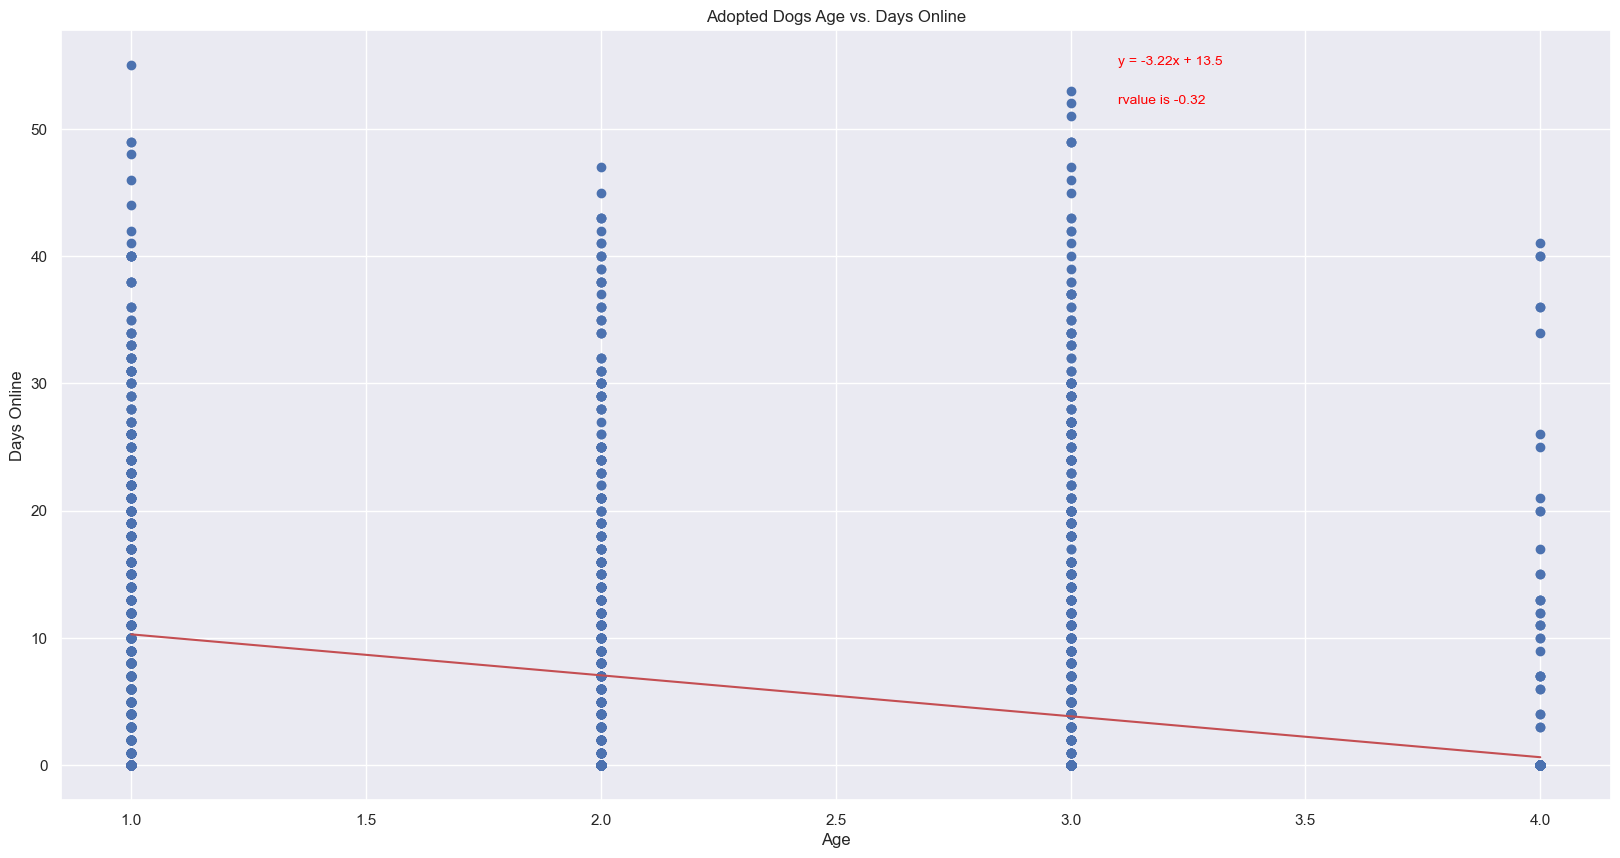

In [ ]:
# mapping the age column
value_mapping_age = {'Baby': 1, 'Young': 2, 'Adult': 3, 'Senior': 4}
adopted_age_corr = adopted.copy()
# Replace values in the 'Category' column using the mapping
adopted_age_corr['age'] = adopted_age_corr['age'].replace(value_mapping_age)
adopted_age_corr = adopted_age_corr.sort_values(by='age')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(adopted_age_corr['age'], adopted_age_corr['days_on_petfinder'])
regress_values = adopted_age_corr['age'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(adopted_age_corr['age'],adopted_age_corr['days_on_petfinder'])
plt.plot(adopted_age_corr['age'],regress_values,"r-")
plt.annotate(line_eq,(3.1,55),fontsize=10,color="red")
plt.annotate(f"rvalue is {round(rvalue,2)}",(3.1,52),fontsize=10,color="red")
plt.xlabel('Age')
plt.ylabel('Days Online')
plt.title('Adopted Dogs Age vs. Days Online')
plt.savefig('figures/adopted_dogs_by_age_linearregression.png')
plt.show()

We are getting mixed results for the correlation between age and days online prior to adoption with the adoptable dog population having a positive correlation of .24 and adopted dogs having a negative correlation of -.32. This looks to be due to more senior dogs getting adopted faster in the adopted population. 

In [116]:
# creating dataframe by adoptable size

adoptable_size = adoptable.groupby("size").count()
adoptable_size = adoptable_size["id"]
adoptable_size_df = pd.DataFrame(adoptable_size)
adoptable_size_df.reset_index(inplace=True)
adoptable_size_df['% Total'] = adoptable_size_df['id'] / len(adoptable)
adoptable_size_df = adoptable_size_df.sort_values(by='id', ascending=False)
adoptable_size_df

,size,id,% Total
2,Medium,1864,0.466117
1,Large,1378,0.344586
3,Small,720,0.180045
0,Extra Large,37,0.009252


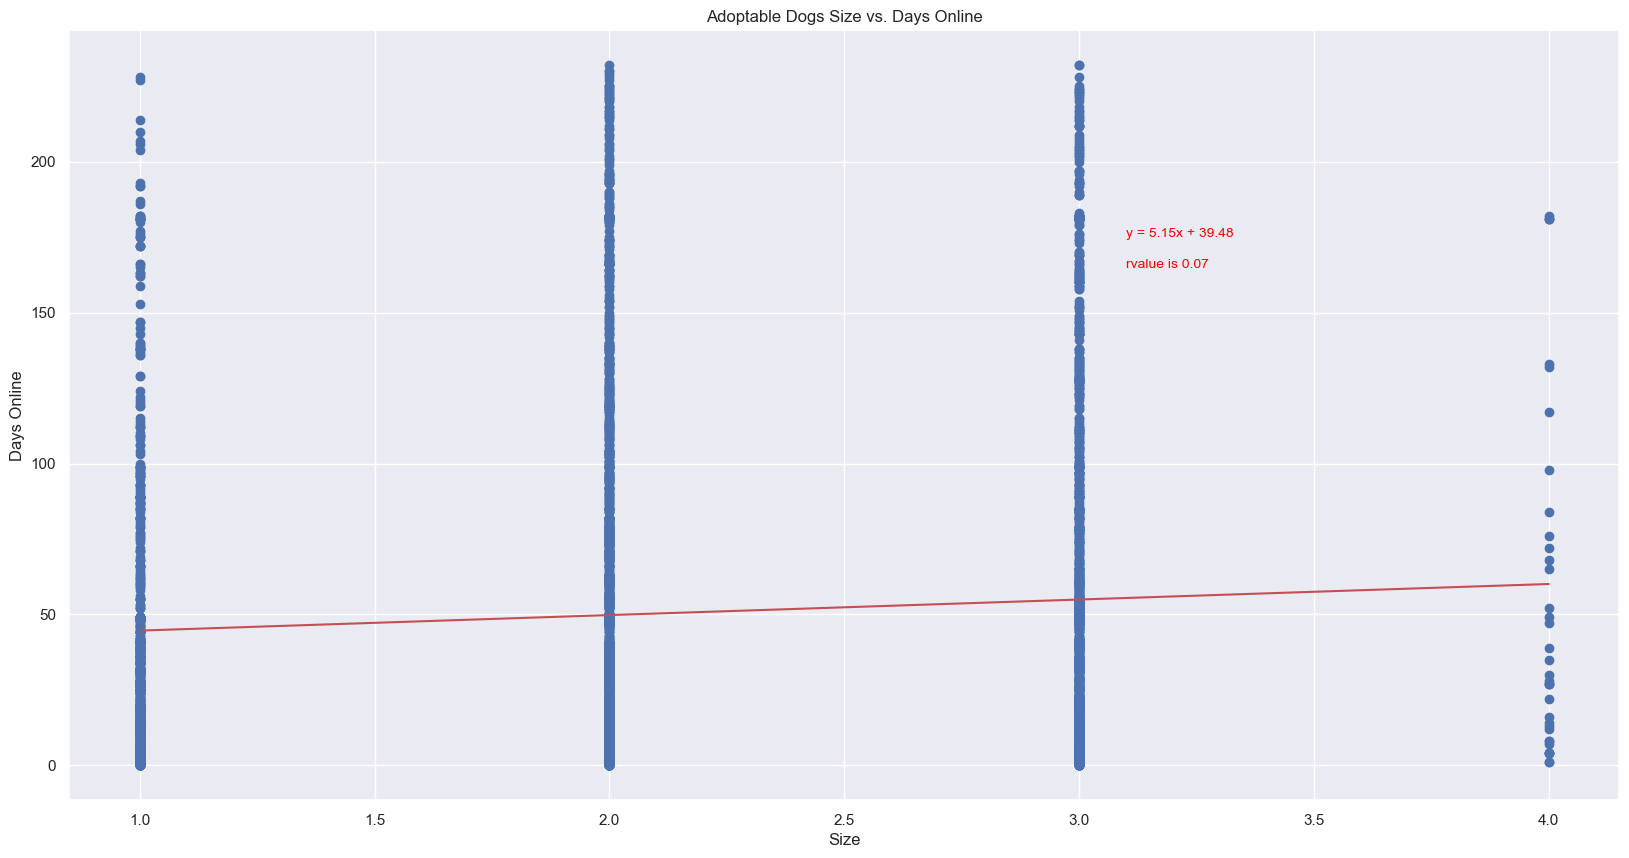

In [117]:
value_mapping_size = {'Small': 1, 'Medium': 2, 'Large': 3, 'Extra Large': 4}
adoptable_size_corr = adoptable.copy()
# Replace values in the 'Category' column using the mapping
adoptable_size_corr['size'] = adoptable_size_corr['size'].replace(value_mapping_size)
adoptable_size_corr = adoptable_size_corr.sort_values(by='size')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(adoptable_size_corr['size'], adoptable_size_corr['adoptable_days_online'])
regress_values = adoptable_size_corr['size'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(adoptable_size_corr['size'],adoptable_size_corr['adoptable_days_online'])
plt.plot(adoptable_size_corr['size'],regress_values,"r-")
plt.annotate(line_eq,(3.1,175),fontsize=10,color="red")
plt.annotate(f"rvalue is {round(rvalue,2)}",(3.1,165),fontsize=10,color="red")
plt.xlabel('Size')
plt.ylabel('Days Online')
plt.title('Adoptable Dogs Size vs. Days Online')
plt.savefig('figures/adoptable_dogs_by_size_linearregression.png')
plt.show()

In [118]:
# creating dataframe by adopted size
adopted_size = adopted.groupby("size").count()
adopted_size = adopted_size["id"]
adopted_size_df = pd.DataFrame(adopted_size)
adopted_size_df.reset_index(inplace=True)
adopted_size_df['% Total'] = adopted_size_df['id'] / len(adopted)
adopted_size_df = adopted_size_df.sort_values(by='id', ascending=False)
adopted_size_df

,size,id,% Total
2,Medium,2078,0.528081
3,Small,987,0.250826
1,Large,841,0.213723
0,Extra Large,29,0.007370


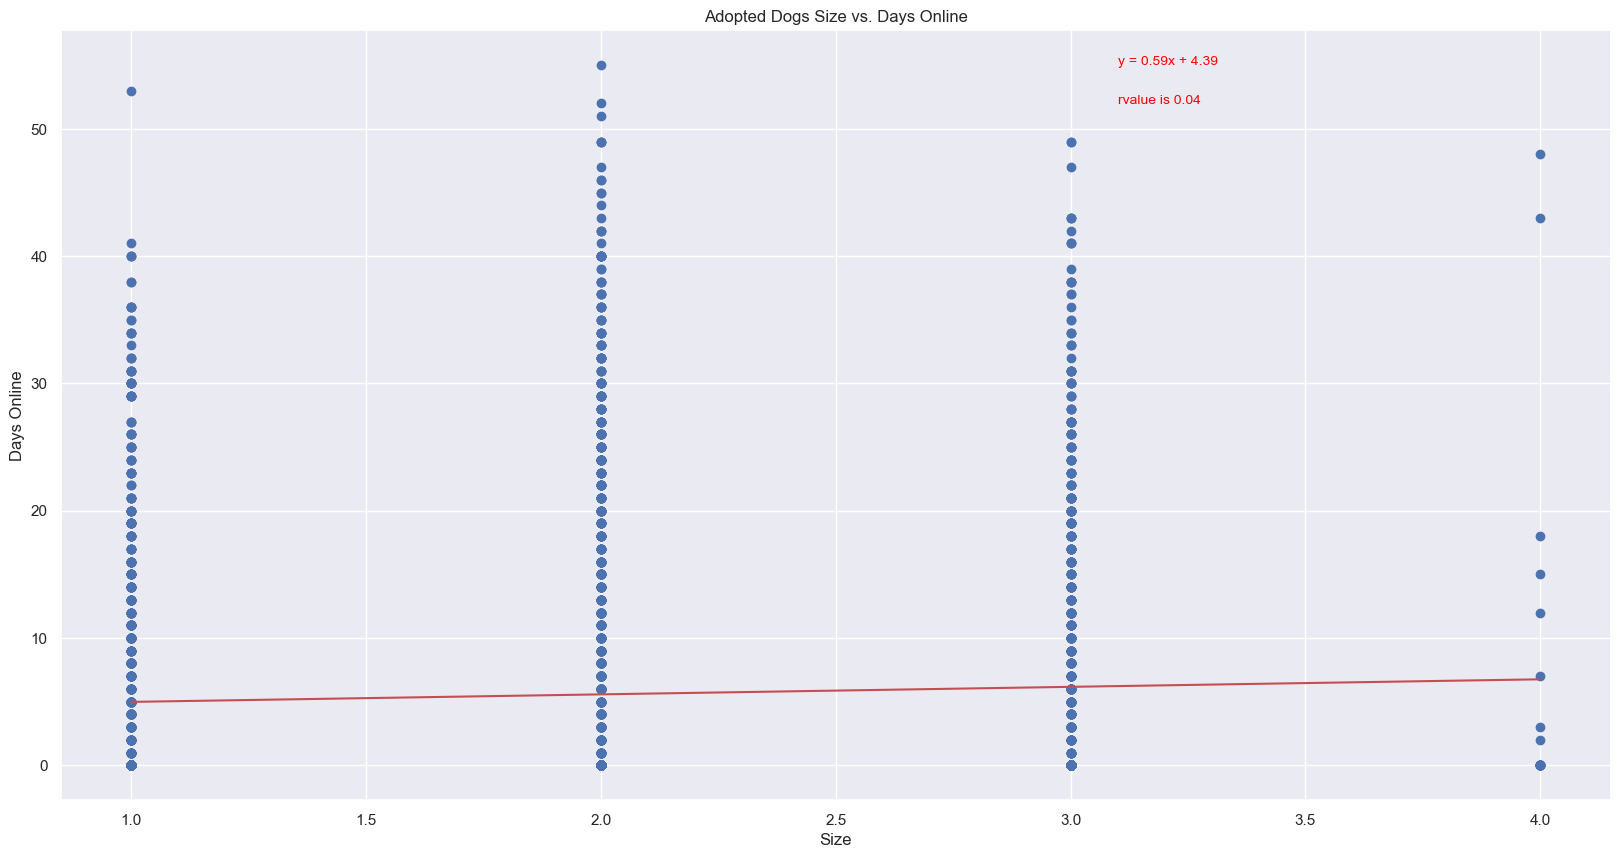

In [119]:
value_mapping_size = {'Small': 1, 'Medium': 2, 'Large': 3, 'Extra Large': 4}
adopted_size_corr = adopted.copy()
# Replace values in the 'Category' column using the mapping
adopted_size_corr['size'] = adopted_size_corr['size'].replace(value_mapping_size)
adopted_size_corr = adopted_size_corr.sort_values(by='size')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(adopted_size_corr['size'], adopted_size_corr['days_on_petfinder'])
regress_values = adopted_size_corr['size'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(adopted_size_corr['size'],adopted_size_corr['days_on_petfinder'])
plt.plot(adopted_size_corr['size'],regress_values,"r-")
plt.annotate(line_eq,(3.1,55),fontsize=10,color="red")
plt.annotate(f"rvalue is {round(rvalue,2)}",(3.1,52),fontsize=10,color="red")
plt.xlabel('Size')
plt.ylabel('Days Online')
plt.title('Adopted Dogs Size vs. Days Online')
plt.savefig('figures/adopted_dogs_by_size_linearregression.png')
plt.show()

For size of the dogs, we are seeing a slight positive correlation of larger size dogs being available longer prior to adoption. The correlation coefficients are .07 in the adoptable population and .04 in the population that has already been adopted.

In [120]:
# Adopted Dog Coat vs. Days Online
coat_value_map = {'Short': 1, 'Medium':2, 'Long':3,'Curly':4,'Wire':5 }
adopted_coat = adopted.copy()
adopted_coat['coat'] = adopted_coat['coat'].replace(coat_value_map)
adopted_coat = adopted_coat.sort_values(by='coat')

adopted_coat

,Unnamed: 0,id,organization_id,organization_id.1,url,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.2,organization_id.3,days_on_petfinder,today,adoptable_days_online
4000,4000,69340177,IL145,il145,https://www.petfinder.com/dog/splatter-6934017...,Dog,Baby,Male,Medium,1.0,...,IL,60477,US,69340177,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
5140,5140,68781084,IL641,il641,https://www.petfinder.com/dog/echo-68781084/il...,Dog,Young,Female,Large,1.0,...,IL,60901,US,68781084,dog,IL641,il641,12.0,2023-10-17 21:42:51.576571-05:00,39
5141,5141,68780681,IL930,il930,https://www.petfinder.com/dog/hoover-68780681/...,Dog,Baby,Male,Medium,1.0,...,IL,60463,US,68780681,dog,IL930,il930,40.0,2023-10-17 21:42:51.576571-05:00,39
5142,5142,68780669,IL930,il930,https://www.petfinder.com/dog/sinclair-6878066...,Dog,Baby,Female,Medium,1.0,...,IL,60463,US,68780669,dog,IL930,il930,23.0,2023-10-17 21:42:51.576571-05:00,39
5143,5143,68780638,IL930,il930,https://www.petfinder.com/dog/saget-68780638/i...,Dog,Baby,Male,Medium,1.0,...,IL,60463,US,68780638,dog,IL930,il930,24.0,2023-10-17 21:42:51.576571-05:00,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7995,66447254,IL81,il81,https://www.petfinder.com/dog/fergie-66447254/...,Dog,Adult,Female,Medium,NaN,...,IL,60135,US,66447254,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7996,7996,66447260,IL81,il81,https://www.petfinder.com/dog/06-0617-66447260...,Dog,Adult,Male,Medium,NaN,...,IL,60135,US,66447260,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7997,7997,66447266,IL81,il81,https://www.petfinder.com/dog/emmitt-66447266/...,Dog,Senior,Male,Medium,NaN,...,IL,60135,US,66447266,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7998,7998,66447273,IL81,il81,https://www.petfinder.com/dog/bella-66447273/i...,Dog,Adult,Female,Medium,NaN,...,IL,60135,US,66447273,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56


In [121]:
# Put coats into a list for for loop (and later for plot labels)
coats = ['Short', 'Medium', 'Long', 'Wire', 'Curly']
coat_value_map = {'Short': 1, 'Medium':2, 'Long':3,'Curly':4,'Wire':5 }

data = []
for coat in coats:
     adoptability_of_coats = adopted_coat.loc[(adopted_coat["coat"]==coat_value_map[coat]),"days_on_petfinder"]
     data.append(adoptability_of_coats)
for i in range(len(data)):

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
     quartiles = data[i].quantile([.25,.5,.75])
     lowerq = quartiles[0.25]
     upperq = quartiles[0.75]
     iqr = upperq - lowerq
     print(f"The IQR for {coats[i]} is {iqr}")

     lower_bound = lowerq - (1.5*iqr)
     upper_bound = upperq + (1.5*iqr) 
     print(f"The lower bound for {coats[i]} is {lower_bound}")
     print(f"The upper bound for {coats[i]} is {upper_bound}")

The IQR for Short is 14.0
The lower bound for Short is -15.0
The upper bound for Short is 41.0
The IQR for Medium is 12.5
The lower bound for Medium is -13.75
The upper bound for Medium is 36.25
The IQR for Long is 16.0
The lower bound for Long is -21.0
The upper bound for Long is 43.0
The IQR for Wire is 8.0
The lower bound for Wire is -6.0
The upper bound for Wire is 26.0
The IQR for Curly is 13.0
The lower bound for Curly is -15.5
The upper bound for Curly is 36.5


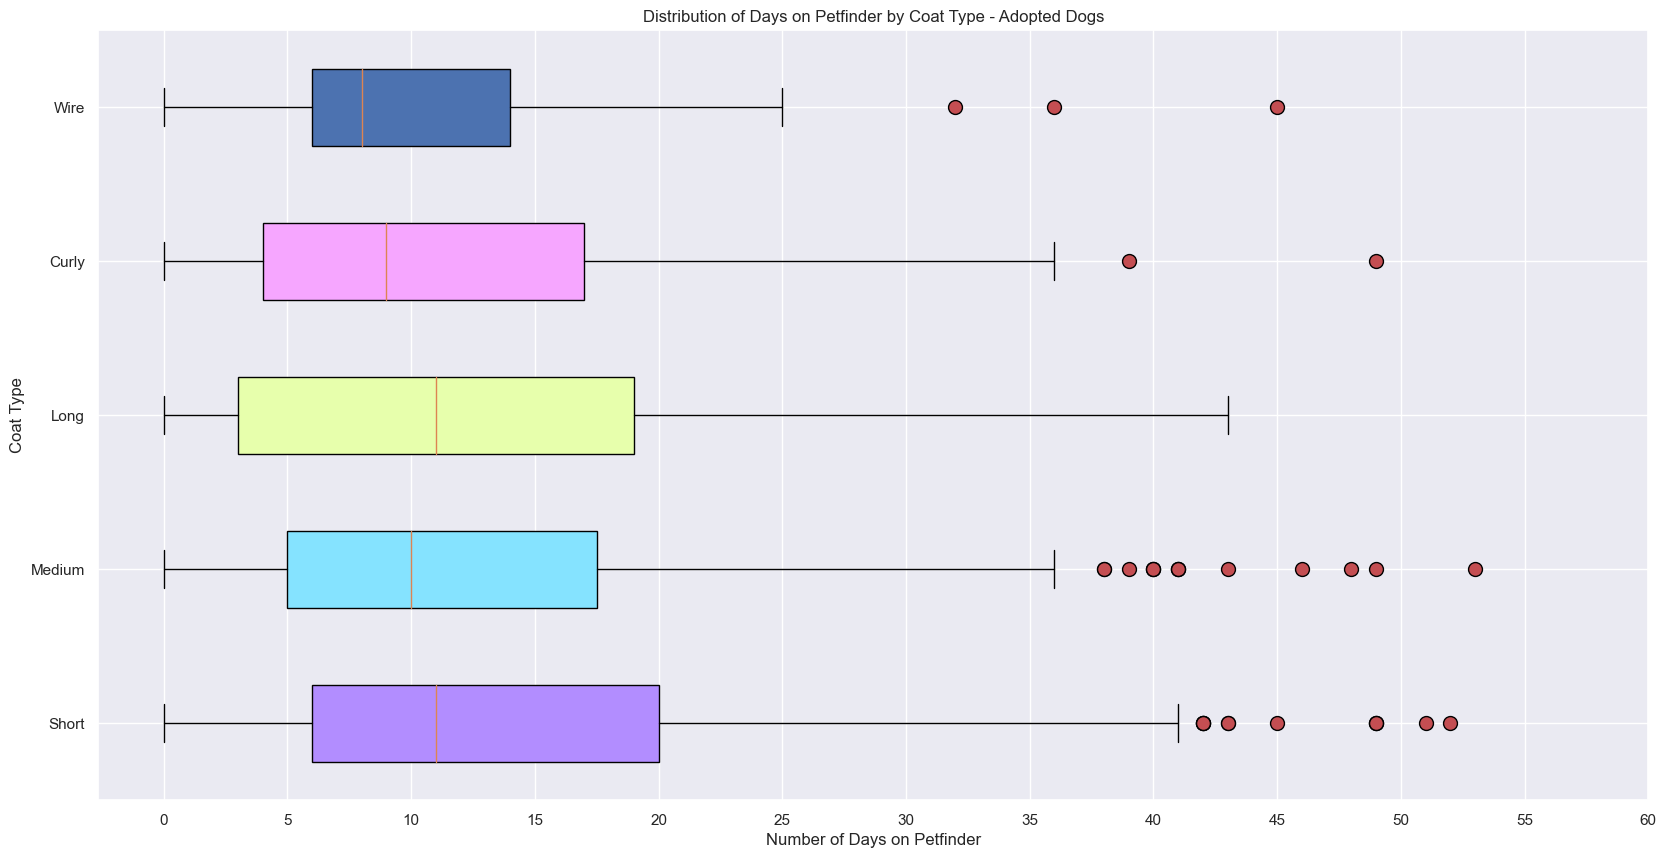

In [122]:
# Complete - can add colors
coat_groups = adopted_coat.groupby('coat')
short = coat_groups.get_group(1)['days_on_petfinder']
medium = coat_groups.get_group(2)['days_on_petfinder']
long = coat_groups.get_group(3)['days_on_petfinder']
curly = coat_groups.get_group(4)['days_on_petfinder']
wire = coat_groups.get_group(5)['days_on_petfinder']

data = [short, medium, long, curly, wire]
labels = ['Short', 'Medium', 'Long', 'Curly', 'Wire']
colors = ['#b28dff', '#85e3ff', '#e7ffac','#f6a6ff']

flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                  linestyle='none')

colors = ['#b28dff', '#85e3ff', '#e7ffac','#f6a6ff']
xticks = np.arange(0,65,5)

final_product= plt.boxplot(data, labels=labels, patch_artist=True, notch=False, vert=False, widths=0.5, flierprops=flierprops)
plt.title('Distribution of Days on Petfinder by Coat Type - Adopted Dogs')
plt.xlabel('Number of Days on Petfinder')
plt.ylabel('Coat Type')
plt.xticks(xticks)
for patch, color in zip(final_product['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('figures/box_plot_daysonpetfinder_vs_coat.jpeg', bbox_inches='tight')

plt.show()

The majority of the data is more closely distributed with a relatively small number of outliers